In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random
import librosa
import librosa.display
import librosa.feature
import IPython.display as ipd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def trans_data(path):
  y, sr = librosa.load(path)
  # 提取梅爾頻譜圖
  mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
  # 提取梅爾頻率倒譜係數（MFCCs）
  mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=512)
  #time filtering
  if mfccs.shape[1] > 500:
    mfccs = mfccs[:, :500]
  #計算comprehensive_mfccs,mfccs is a coefficient it can represent some speech feature, so we take delta mfccs to find out the change in different frame to get more features
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs,order=2)
    comprehensive_mfccs = np.concatenate((mfccs,delta_mfccs,delta2_mfccs))
  else:
    mfccs = np.nan
    comprehensive_mfccs = np.nan
  # 提取節拍
  tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
  #檔名
  filename = os.path.basename(path)
  #上一層資料夾
  head, tail = os.path.split(path)
  parent = os.path.split(head)[1]
  #再上一層
  grandparent = os.path.split(os.path.split(head)[0])[1]
  # 音檔長度(秒數)
  duration = librosa.get_duration(y=y, sr=sr)
  return np.array([grandparent, mel_spec, mfccs, comprehensive_mfccs, tempo, beat_frames, duration])

def list_files(directory,n,n2):
  file_paths = []
  y     = 0
  #我想讓他不要做太多輪可以再修改
  for root, dirs, files in os.walk(directory):
      if y <= n2:
        y += 1
        x = 0
        for file in files:
          if file.endswith(".flac") and x <= n:
            x += 1
            file_path = os.path.join(root, file)
            file_paths.append(file_path)
          else:
            continue
  return file_paths

#directory_path = '/content/gdrive/MyDrive/ML_final/train-clean-100/LibriSpeech/train-clean-100/103'
directory_path2 = '/content/drive/MyDrive/train-clean-100/LibriSpeech/train-clean-100/'
files = list_files(directory_path2, 30, 25)
dataset = []
columns = np.array(['speaker_ID', 'mel_spec', 'mfccs', 'comprehensive_mfccs', 'tempo', 'beat_frames', 'duration'])

#for file_path in files:
    #data1 = trans_data(file_path)
    #dataset.append(data1)
#df = pd.DataFrame(dataset, columns=columns)
for file_path2 in files:
    data2 = trans_data(file_path2)
    dataset.append(data2)
#df  = pd.DataFrame(dataset, columns=columns)
df2 = pd.DataFrame(dataset, columns=columns).dropna(subset=['mfccs'])
df2.to_csv('/content/drive/MyDrive/train-clean-100/training_data.csv', index = False)
print(df2)
# dataset

<ipython-input-5-6997d03cc2b9>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([grandparent, mel_spec, mfccs, comprehensive_mfccs, tempo, beat_frames, duration])


   speaker_ID                                           mel_spec  \
0        8975  [[0.013562764, 0.05009381, 0.015737332, 0.0039...   
1        8975  [[0.00069052563, 0.0032217521, 0.0073279813, 0...   
2        8975  [[0.023925018, 0.020816416, 0.037859906, 0.028...   
4         887  [[0.00019083096, 0.0008181844, 0.0003701971, 0...   
5         887  [[4.983245e-05, 0.000306173, 0.00034470813, 0....   
6         887  [[0.00017612295, 0.00058425736, 0.0002678304, ...   
7         887  [[0.00022012042, 0.0015063095, 0.0020633547, 0...   
9         887  [[0.0001727597, 0.00021910359, 0.0005689136, 0...   
10        887  [[5.867335e-05, 0.0010926069, 0.0021885703, 0....   
11        887  [[0.0004966592, 0.0006911855, 0.00068888406, 0...   
12        887  [[0.00010246224, 0.0004690803, 0.00047220837, ...   
13        887  [[6.3321175e-05, 0.0002464032, 0.00061302574, ...   
14        887  [[6.325719e-05, 5.8302332e-05, 0.0007732938, 0...   
16        911  [[1.7083875e-06, 4.5228447e-07, 1

In [ ]:
for col in df2.columns:
  print(col, end=" ")
  try:
    print(len(df2[col].iloc[342]))
  except:
    print("num")
print()
for col in df2.columns:
  print(col, end=" ")
  try:
    print(len(df2[col].iloc[21]))
  except:
    print("num")

speaker_ID 4
mel_spec 128
mfccs 13
comprehensive_mfccs 39
tempo num
beat_frames 36
duration num

speaker_ID 4
mel_spec 128
mfccs 13
comprehensive_mfccs 39
tempo num
beat_frames 39
duration num


In [ ]:
dfs = pd.read_csv('/content/drive/MyDrive/train-clean-100/training_dataset.csv')
print(type(dfs))
dfs

<class 'pandas.core.frame.DataFrame'>


,speaker_ID,mel_spec,mfccs,tempo,beat_frames
0,8975,[[1.3562764e-02 5.0093811e-02 1.5737332e-02 .....,[[-5.6147424e+02 -5.3958472e+02 -5.3424896e+02...,103.359375,[ 22 48 75 99 124 151 175 202 227 252 277 3...
1,8975,[[6.9052563e-04 3.2217521e-03 7.3279813e-03 .....,[[-547.8774 -523.4792 -531.4061 ... -...,95.703125,[ 19 52 80 109 135 160 187 213 237 260 285 3...
2,8975,[[2.3925018e-02 2.0816416e-02 3.7859906e-02 .....,[[-4.9745532e+02 -5.0288818e+02 -5.3641748e+02...,161.499023,[ 28 43 59 77 93 108 124 139 155 171 187 2...
3,8975,[[1.77206309e-03 5.21950889e-03 2.20328756e-02...,[[-5.6593610e+02 -5.4649713e+02 -5.4235272e+02...,123.046875,[ 0 21 42 64 87 108 130 151 170 189 207 2...
4,8975,[[1.8812403e-02 5.1610768e-02 3.6732338e-02 .....,[[-4.1419305e+02 -3.9271136e+02 -3.9620782e+02...,129.199219,[ 12 30 49 67 87 108 127 146 167 187 206 2...
...,...,...,...,...,...
17836,3486,[[1.01029291e-05 5.92578544e-06 1.96760129e-06...,[[-4.14375946e+02 -3.93836761e+02 -3.96097870e...,80.749512,[ 27 64 97 131 163]
17837,3486,[[1.04857463e-04 4.03431550e-05 1.88645645e-05...,[[-3.7236984e+02 -3.4818127e+02 -3.5105618e+02...,103.359375,[ 10 38 61 87 114 139 165 190 215 243 272 297]
17838,3486,[[3.2764429e-04 1.6126991e-04 1.0812984e-04 .....,[[-4.06016602e+02 -3.80057373e+02 -3.93866333e...,117.453835,[ 14 36 56 79 100 122 145 168 191 212 232 2...
17839,3486,[[2.00207578e-04 6.22566586e-05 6.65587640e-06...,[[-434.85934 -424.01184 -428.03763 ... -...,89.102909,[ 13 42 67 97 125 153 185 213 242 268 297 3...


In [ ]:
df_cleaned = df2.dropna(subset=['mfccs'])
print(df_cleaned)

    speaker_ID                                           mel_spec  \
0         8975  [[0.013562764, 0.05009381, 0.015737332, 0.0039...   
1         8975  [[0.00069052563, 0.0032217521, 0.0073279813, 0...   
2         8975  [[0.023925018, 0.020816416, 0.037859906, 0.028...   
4         8975  [[0.018812403, 0.051610768, 0.03673234, 0.0205...   
5         8975  [[0.0015895728, 0.011106499, 0.012752957, 0.00...   
..         ...                                                ...   
481       8797  [[0.00050700526, 0.0017481789, 0.004797363, 0....   
482       8797  [[0.0019164211, 0.008109502, 0.01374053, 0.009...   
483       8797  [[0.0016865637, 0.007838753, 0.005015889, 0.00...   
484       8797  [[0.0002127933, 0.0013792287, 0.0011977789, 0....   
485       8797  [[0.0016104099, 0.004940457, 0.0053619025, 0.0...   

                                                 mfccs  \
0    [[-561.47424, -539.5847, -534.24896, -528.1076...   
1    [[-547.8774, -523.4792, -531.4061, -549.69037,... 

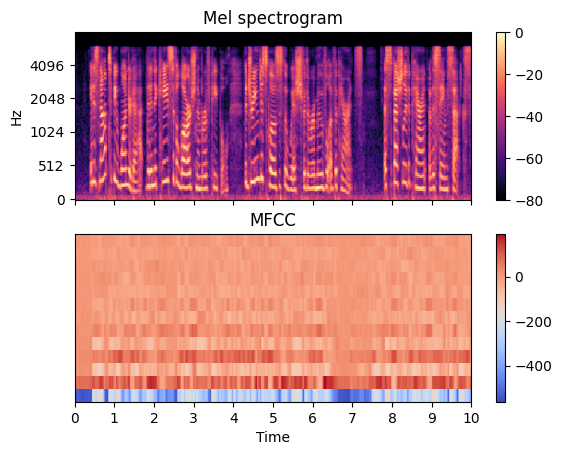

In [ ]:

# Assuming df2 is your DataFrame containing 'mel_spec' and 'mfccs' columns

S = df2['mel_spec'][1]
mfccs = df2['mfccs'][0]

fig, ax = plt.subplots(nrows=2, sharex=True)

# Mel spectrogram plot
img_mel = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                                   x_axis='time', y_axis='mel', fmax=8000,
                                   ax=ax[0])
fig.colorbar(img_mel, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()

# MFCC plot
img_mfcc = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img_mfcc, ax=[ax[1]])
ax[1].set(title='MFCC')

# Set x-axis limits to 10 seconds
for axis in ax:
    axis.set_xlim([0, 10])

plt.show()


In [ ]:
dataset = pd.read_csv('/content/sample_data/training_data.csv')
dataset